In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
%matplotlib inline

idx = pd.IndexSlice

In [19]:
sns.set_style("ticks")
sns.set_context("paper",font_scale=2.0)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'serif', 'serif': ['Gentium Basic'], 'size': 10}
plt.rc('font', **font)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Gentium Basic'
matplotlib.rcParams['mathtext.it'] = 'Gentium Basic:italic'
matplotlib.rcParams['mathtext.bf'] = 'Gentium Basic:bold'

from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

pgf_with_custom_preamble = {
"font.family": "serif", # use serif/main font for text elements
"text.usetex": False,    # use inline math for ticks
"pgf.preamble": [
    "\\usepackage{mathpazo}",
    "\\usepackage{gentium}",
    "\\DeclareSymbolFont{sfnumbers}{T1}{gentium}{m}{n}",
    "\\SetSymbolFont{sfnumbers}{bold}{T1}{gentium}{bx}{n}",
    "\\DeclareMathSymbol{0}\mathalpha{sfnumbers}{\"30}",
    "\\DeclareMathSymbol{1}\mathalpha{sfnumbers}{\"31}",
    "\\DeclareMathSymbol{2}\mathalpha{sfnumbers}{\"32}",
    "\\DeclareMathSymbol{3}\mathalpha{sfnumbers}{\"33}",
    "\\DeclareMathSymbol{4}\mathalpha{sfnumbers}{\"34}",
    "\\DeclareMathSymbol{5}\mathalpha{sfnumbers}{\"35}",
    "\\DeclareMathSymbol{6}\mathalpha{sfnumbers}{\"36}",
    "\\DeclareMathSymbol{7}\mathalpha{sfnumbers}{\"37}",
    "\\DeclareMathSymbol{8}\mathalpha{sfnumbers}{\"38}",
    "\\DeclareMathSymbol{9}\mathalpha{sfnumbers}{\"39}",
    "\\DeclareMathSymbol{,}\mathalpha{sfnumbers}{\"2C}"
    ]
}
matplotlib.rcParams.update(pgf_with_custom_preamble)

/home/sbg/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [20]:
df_merged = pd.read_csv('../DL/data/df_merged_analysis.csv', index_col=0)

In [21]:
df_merged.head()

,statefips,date,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease,statename,shadow_index_normalized,Rt,ContainmentHealthIndex
0,1,2020-03-07,8.33,0.0,0.0,0.0,0.0,Alabama,7.647214,2.058230,14.74
1,1,2020-03-08,8.33,0.0,0.0,0.0,0.0,Alabama,6.104251,2.035865,14.74
2,1,2020-03-09,8.33,0.0,0.0,0.0,0.0,Alabama,7.227147,2.005499,14.74
3,1,2020-03-10,16.67,0.0,0.0,0.0,0.0,Alabama,6.999156,1.978277,20.51
4,1,2020-03-11,16.67,0.0,0.0,0.0,10.0,Alabama,6.644607,1.939723,20.51


In [5]:
df_merged = df_merged[df_merged['date'] >= '2020-07-01']   # the stationary part only

In [22]:
stationary_df = df_merged.groupby('statefips').mean()
stationary_df = stationary_df.rename(columns={'shadow_index_normalized':'mean_sdi'})

In [23]:
stationary_df.head()

,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease,mean_sdi,Rt,ContainmentHealthIndex
statefips,,,,,,,,
1,50.640951,1367.819018,21.153374,126.733129,6435.490798,37.476002,1.059871,53.349172
2,61.779662,159.316923,0.800000,3.673846,0.000000,51.474214,1.046466,58.785015
4,57.534110,2247.361963,38.184049,155.371166,10365.064417,49.906276,1.083448,57.144294
5,59.677607,880.941718,14.386503,41.107362,0.000000,34.532695,1.063061,57.934233
6,66.691871,9672.165644,115.113497,0.000000,0.000000,56.955051,1.054155,63.981994


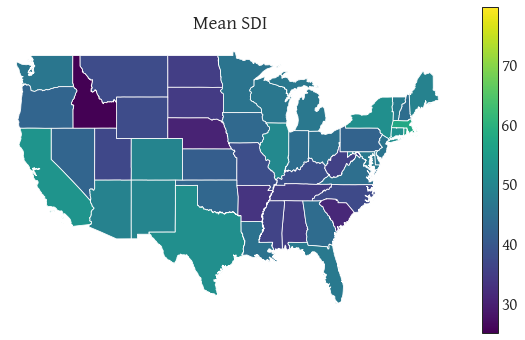

In [8]:
usa = gpd.read_file('../data/US_States/shapefile/states.shp')
usa = usa.set_index(['STATE_FIPS'])
usa.index = usa.index.rename('statefips').astype(int)
usa = usa.join(stationary_df)
plt.rc('font',  size=16) 
fig, ax = plt.subplots(1,figsize=(10,6))
usa.plot('mean_sdi', legend=True, ax=ax, cmap='viridis')

plt.axis('off')
plt.xlim(-126, -65)
plt.ylim(25,51)
plt.title('Mean SDI')
plt.savefig('../figures/mean_sdi.pdf', bbox_inches='tight')

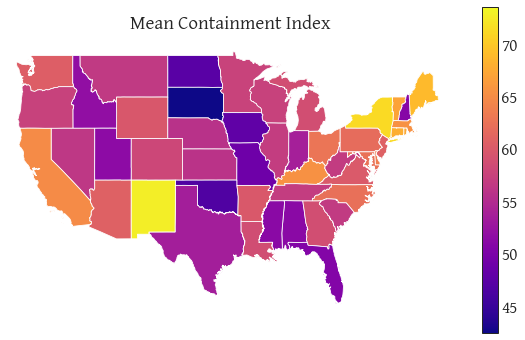

In [9]:
fig, ax = plt.subplots(1,figsize=(10,6))
usa.plot('ContainmentHealthIndex', legend=True, ax=ax, cmap='plasma')
plt.axis('off')
plt.xlim(-126, -65)
plt.ylim(25,51)
plt.title('Mean Containment Index')
plt.savefig('../figures/mean_containment.pdf', bbox_inches='tight')

In [24]:
state_info = pd.read_csv('../data/US_States/State Characteristics - State Characteristics.csv')
state_info.tail()

,statefips,statename,stateabbrev,state_pop2019,Governor_info,Governor_name,Governor_Party,Vote_info,Vote_Party,ARS_Info,ARS_Info_Code,ARS_Region,ARS_Division,Mobility_FIPS,Mobility_info,1980_mobility
46,51,Virginia,VA,8535519,Governor of Virginia,Ralph Northam,Democratic,Virginia,Dem,Virginia,VA,South,South Atlantic,51,VA,0.479
47,53,Washington,WA,7614893,Governor of Washington,Jay Inslee,Democratic,Washington,Dem,Washington,WA,West,Pacific,53,WA,0.458
48,54,West Virginia,WV,1792147,Governor of West Virginia,Jim Justice,Republican,West Virginia,Rep,West Virginia,WV,South,South Atlantic,54,WV,0.499
49,55,Wisconsin,WI,5822434,Governor of Wisconsin,Tony Evers,Democratic,Wisconsin,Dem,Wisconsin,WI,Midwest,East North Central,55,WI,0.506
50,56,Wyoming,WY,578759,Governor of Wyoming,Mark Gordon,Republican,Wyoming,Rep,Wyoming,WY,West,Mountain,56,WY,0.490


In [25]:
df_merged_poli = df_merged.merge(state_info, on='statefips', how='left')
df_merged_poli.head()

,statefips,date,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease,statename_x,shadow_index_normalized,Rt,...,Governor_Party,Vote_info,Vote_Party,ARS_Info,ARS_Info_Code,ARS_Region,ARS_Division,Mobility_FIPS,Mobility_info,1980_mobility
0,1,2020-03-07,8.33,0.0,0.0,0.0,0.0,Alabama,7.647214,2.058230,...,Republican,Alabama,Rep,Alabama,AL,South,East South Central,1,AL,0.519
1,1,2020-03-08,8.33,0.0,0.0,0.0,0.0,Alabama,6.104251,2.035865,...,Republican,Alabama,Rep,Alabama,AL,South,East South Central,1,AL,0.519
2,1,2020-03-09,8.33,0.0,0.0,0.0,0.0,Alabama,7.227147,2.005499,...,Republican,Alabama,Rep,Alabama,AL,South,East South Central,1,AL,0.519
3,1,2020-03-10,16.67,0.0,0.0,0.0,0.0,Alabama,6.999156,1.978277,...,Republican,Alabama,Rep,Alabama,AL,South,East South Central,1,AL,0.519
4,1,2020-03-11,16.67,0.0,0.0,0.0,10.0,Alabama,6.644607,1.939723,...,Republican,Alabama,Rep,Alabama,AL,South,East South Central,1,AL,0.519


In [26]:
df_merged_poli.columns

Index(['statefips', 'date', 'Stringency', 'positiveIncrease', 'deathIncrease',
       'hospitalizedIncrease', 'totalTestsPeopleViralIncrease', 'statename_x',
       'shadow_index_normalized', 'Rt', 'ContainmentHealthIndex',
       'statename_y', 'stateabbrev', 'state_pop2019', 'Governor_info',
       'Governor_name', 'Governor_Party', 'Vote_info', 'Vote_Party',
       'ARS_Info', 'ARS_Info_Code', 'ARS_Region', 'ARS_Division',
       'Mobility_FIPS', 'Mobility_info', '1980_mobility'],
      dtype='object')

Text(0.5, 1.0, 'Mean SDI by Governor Party')

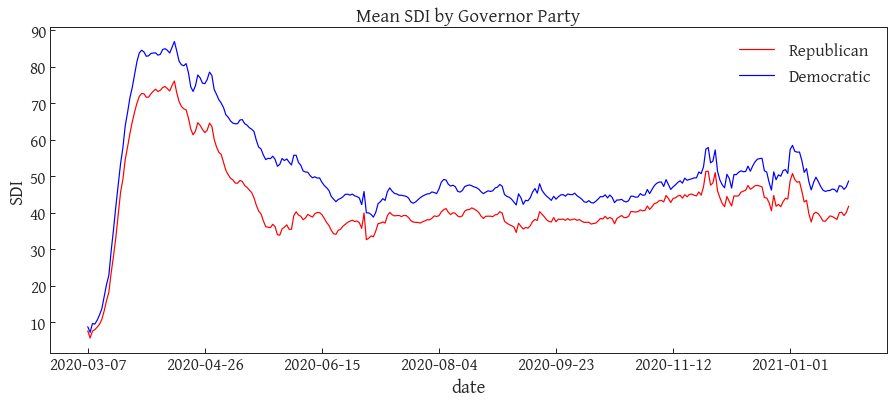

In [27]:
Rep = df_merged_poli[df_merged_poli.Governor_Party == 'Republican']
Dem = df_merged_poli[df_merged_poli.Governor_Party == 'Democratic']
plt.figure(figsize=(15,6))
plt.rc('font',  size=16) 
Rep.groupby('date')['shadow_index_normalized'].mean().plot(c='r', label='Republican')
Dem.groupby('date')['shadow_index_normalized'].mean().plot(c='b', label='Democratic')
plt.legend(frameon=False)
plt.ylabel('SDI')
plt.title('Mean SDI by Governor Party')

Text(0.5, 1.0, 'Mean SDI by Vote Party')

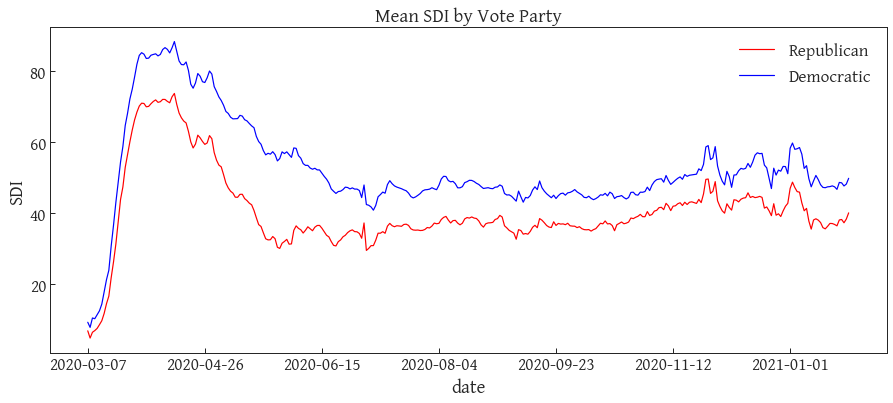

In [28]:
Rep = df_merged_poli[df_merged_poli.Vote_Party == 'Rep']
Dem = df_merged_poli[df_merged_poli.Vote_Party == 'Dem']
plt.figure(figsize=(15,6))
plt.rc('font',  size=16) 
Rep.groupby('date')['shadow_index_normalized'].mean().plot(c='r', label='Republican')
Dem.groupby('date')['shadow_index_normalized'].mean().plot(c='b', label='Democratic')
plt.legend(frameon=False)
plt.ylabel('SDI')
plt.title('Mean SDI by Vote Party')

Text(0.5, 1.0, 'Mean SDI across States by Governor Party and Voter Party')

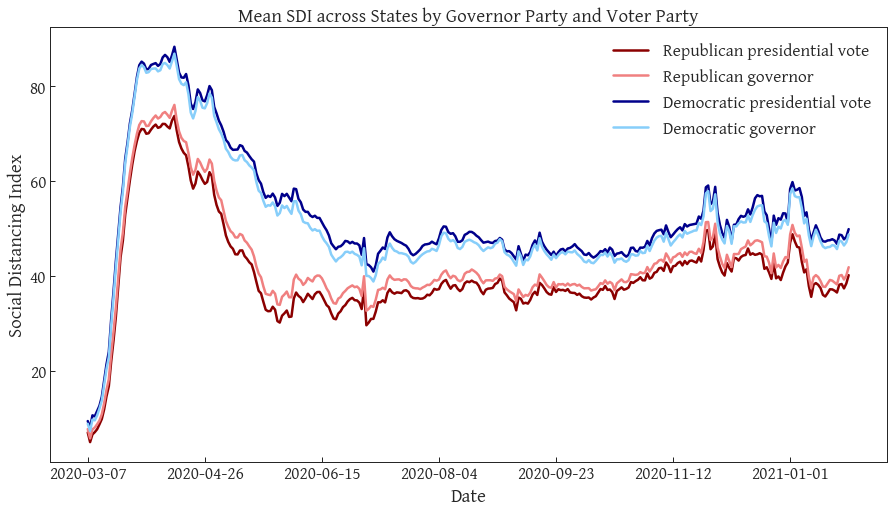

In [29]:
Rep_vote = df_merged_poli[df_merged_poli.Vote_Party == 'Rep']
Dem_vote = df_merged_poli[df_merged_poli.Vote_Party == 'Dem']
Rep_gov = df_merged_poli[df_merged_poli.Governor_Party == 'Republican']
Dem_gov = df_merged_poli[df_merged_poli.Governor_Party == 'Democratic']
plt.figure(figsize=(15,8))
plt.rc('font',  size=16) 
Rep_vote.groupby('date')['shadow_index_normalized'].mean().plot(c='darkred', lw=2.5, label='Republican presidential vote')
Rep_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='lightcoral', lw=2.5, label='Republican governor')
Dem_vote.groupby('date')['shadow_index_normalized'].mean().plot(c='darkblue', lw=2.5,label='Democratic presidential vote')
Dem_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='lightskyblue',lw=2.5, label='Democratic governor')
plt.ylabel('Social Distancing Index')
plt.xlabel('Date')
plt.legend(frameon=False)
plt.title('Mean SDI across States by Governor Party and Voter Party')

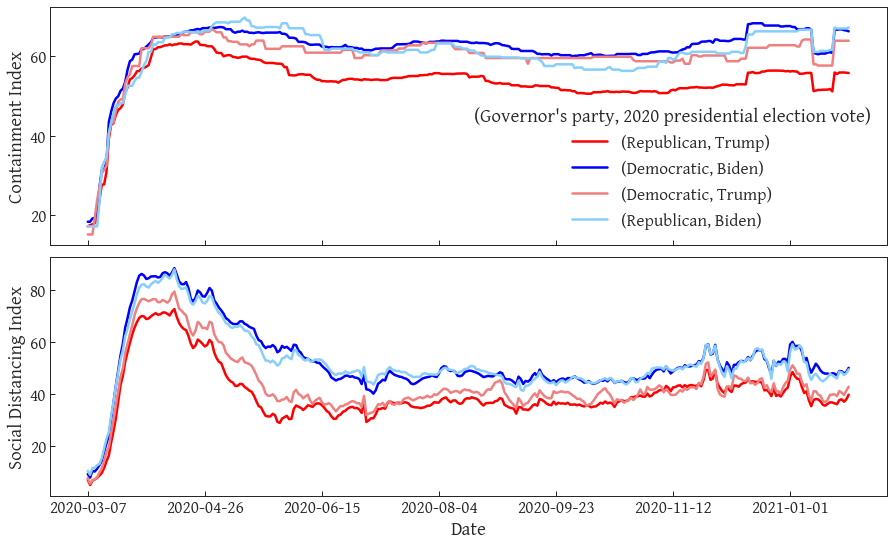

In [54]:
fig,ax = plt.subplots(2,1, figsize=(15,9), sharex=True, gridspec_kw={'hspace':0.05})
plt.rc('font',  size=16) 


Rep_vote_Rep_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Rep') & (df_merged_poli.Governor_Party == 'Republican')]
Dem_vote_Dem_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Dem') & (df_merged_poli.Governor_Party == 'Democratic')]
Rep_vote_Dem_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Rep') & (df_merged_poli.Governor_Party == 'Democratic')]
Dem_vote_Rep_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Dem') & (df_merged_poli.Governor_Party == 'Republican')]

Rep_vote_Rep_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='r',lw=2.5, label='(Republican, Trump)',ax=ax[0])
Dem_vote_Dem_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='b',lw=2.5, label='(Democratic, Biden)',ax=ax[0])
Rep_vote_Dem_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='lightcoral',lw=2.5,label='(Democratic, Trump)',ax=ax[0])
Dem_vote_Rep_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='lightskyblue',lw=2.5, label='(Republican, Biden)',ax=ax[0])

Rep_vote_Rep_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='r',lw=2.5, label='Republican governor and republican vote',ax=ax[1])
Dem_vote_Dem_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='b',lw=2.5, label='Democratic governor and democratic vote', ax=ax[1])
Rep_vote_Dem_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='lightcoral',lw=2.5,label='Democratic governor and republican vote',ax=ax[1])
Dem_vote_Rep_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='lightskyblue',lw=2.5, label='Republican governor and democratic vote', ax=ax[1])


ax[1].set_xlabel(r'Date')
ax[1].set_ylabel('Social Distancing Index')
ax[0].set_ylabel('Containment Index')
ax[0].legend(frameon=False, title="(Governor's party, 2020 presidential election vote)")
plt.savefig('../figures/sdi_containment_repdem.eps', bbox_inches='tight')

In [63]:
dt = '2020-07-01'

Rep_vote_Rep_gov_cont = Rep_vote_Rep_gov.loc[Rep_vote_Rep_gov['date'] >= dt].groupby('date')['ContainmentHealthIndex'].mean()
Dem_vote_Dem_gov_cont = Dem_vote_Dem_gov.loc[Dem_vote_Dem_gov['date'] >= dt].groupby('date')['ContainmentHealthIndex'].mean()
Rep_vote_Dem_gov_cont = Rep_vote_Dem_gov.loc[Rep_vote_Dem_gov['date'] >= dt].groupby('date')['ContainmentHealthIndex'].mean()
Dem_vote_Rep_gov_cont = Dem_vote_Rep_gov.loc[Dem_vote_Rep_gov['date'] >= dt].groupby('date')['ContainmentHealthIndex'].mean()

Rep_vote_Rep_gov_sdi = Rep_vote_Rep_gov.loc[Rep_vote_Rep_gov['date'] >= dt].groupby('date')['shadow_index_normalized'].mean()
Dem_vote_Dem_gov_sdi = Dem_vote_Dem_gov.loc[Dem_vote_Dem_gov['date'] >= dt].groupby('date')['shadow_index_normalized'].mean()
Rep_vote_Dem_gov_sdi = Rep_vote_Dem_gov.loc[Rep_vote_Dem_gov['date'] >= dt].groupby('date')['shadow_index_normalized'].mean()
Dem_vote_Rep_gov_sdi = Dem_vote_Rep_gov.loc[Dem_vote_Rep_gov['date'] >= dt].groupby('date')['shadow_index_normalized'].mean()

Rep_vote_Rep_gov_ratio = (Rep_vote_Rep_gov_sdi / Rep_vote_Rep_gov_cont).mean()
Dem_vote_Dem_gov_ratio = (Dem_vote_Dem_gov_sdi / Dem_vote_Dem_gov_cont).mean()
Rep_vote_Dem_gov_ratio = (Rep_vote_Dem_gov_sdi / Rep_vote_Dem_gov_cont).mean()
Dem_vote_Rep_gov_ratio = (Dem_vote_Rep_gov_sdi / Dem_vote_Rep_gov_cont).mean()

print(Rep_vote_Rep_gov_ratio,Dem_vote_Dem_gov_ratio,Rep_vote_Dem_gov_ratio,Dem_vote_Rep_gov_ratio)

0.7208612770107455 0.7675249899284913 0.6684471642889962 0.7945456868941243


In [64]:
(df_merged_poli.loc[df_merged_poli['date'] >= dt].groupby('date')['shadow_index_normalized'].mean() / df_merged_poli.loc[df_merged_poli['date'] >= dt].groupby('date')['ContainmentHealthIndex'].mean()).mean()
# Overall mean is 0.75

0.7546668387576233

In [ ]:
Rep_vote_Rep_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='r',lw=2.5, label='(Republican, Trump)',ax=ax[0])
Dem_vote_Dem_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='b',lw=2.5, label='(Democratic, Biden)',ax=ax[0])
Rep_vote_Dem_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='lightcoral',lw=2.5,label='(Democratic, Trump)',ax=ax[0])
Dem_vote_Rep_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='lightskyblue',lw=2.5, label='(Republican, Biden)',ax=ax[0])

Rep_vote_Rep_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='r',lw=2.5, label='Republican governor and republican vote',ax=ax[1])
Dem_vote_Dem_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='b',lw=2.5, label='Democratic governor and democratic vote', ax=ax[1])
Rep_vote_Dem_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='lightcoral',lw=2.5,label='Democratic governor and republican vote',ax=ax[1])
Dem_vote_Rep_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='lightskyblue',lw=2.5, label='Republican governor and democratic vote', ax=ax[1])


Text(0.5, 1.0, 'Mean SDI across States by Governor Party and Voter Party')

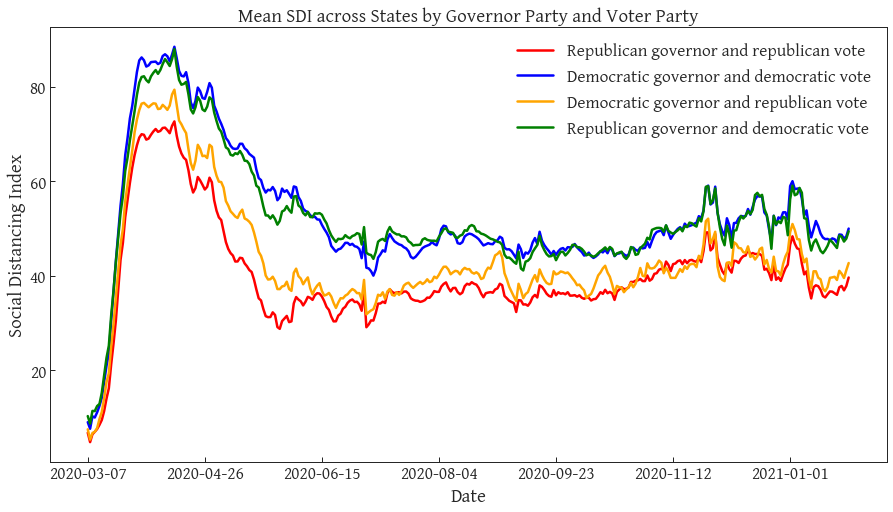

In [30]:
Rep_vote_Rep_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Rep') & (df_merged_poli.Governor_Party == 'Republican')]
Dem_vote_Dem_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Dem') & (df_merged_poli.Governor_Party == 'Democratic')]
Rep_vote_Dem_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Rep') & (df_merged_poli.Governor_Party == 'Democratic')]
Dem_vote_Rep_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Dem') & (df_merged_poli.Governor_Party == 'Republican')]
plt.figure(figsize=(15,8))
plt.rc('font',  size=16) 
Rep_vote_Rep_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='r',lw=2.5, label='Republican governor and republican vote')
Dem_vote_Dem_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='b',lw=2.5, label='Democratic governor and democratic vote')
Rep_vote_Dem_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='orange',lw=2.5,label='Democratic governor and republican vote')
Dem_vote_Rep_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='g',lw=2.5, label='Republican governor and democratic vote')
plt.ylabel('Social Distancing Index')
plt.xlabel('Date')
plt.legend(frameon=False)
plt.title('Mean SDI across States by Governor Party and Voter Party')

Text(0.5, 1.0, 'Mean Containment Health Index across States by Governor Party and Voter Party')

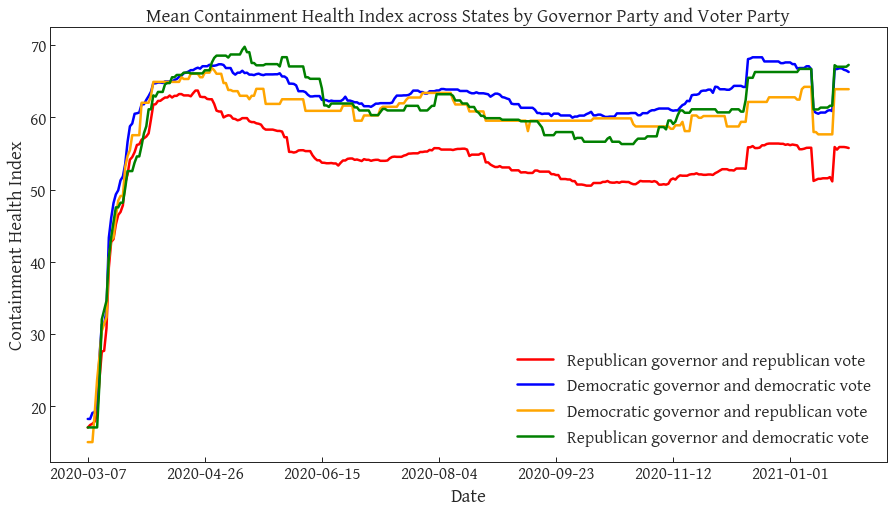

In [31]:
Rep_vote_Rep_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Rep') & (df_merged_poli.Governor_Party == 'Republican')]
Dem_vote_Dem_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Dem') & (df_merged_poli.Governor_Party == 'Democratic')]
Rep_vote_Dem_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Rep') & (df_merged_poli.Governor_Party == 'Democratic')]
Dem_vote_Rep_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Dem') & (df_merged_poli.Governor_Party == 'Republican')]
plt.figure(figsize=(15,8))
plt.rc('font',  size=16) 
Rep_vote_Rep_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='r',lw=2.5, label='Republican governor and republican vote')
Dem_vote_Dem_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='b',lw=2.5, label='Democratic governor and democratic vote')
Rep_vote_Dem_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='orange',lw=2.5,label='Democratic governor and republican vote')
Dem_vote_Rep_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='g',lw=2.5, label='Republican governor and democratic vote')
plt.ylabel('Containment Health Index')
plt.xlabel('Date')
plt.legend(frameon=False)
plt.title('Mean Containment Health Index across States by Governor Party and Voter Party')